### Instruction
1. This tutorial explain how to use calc_barriers wrapper
2. calc_barriers is high level wrapeer used for calculation of migration barriers. 
3. The calculations are performed by executing the same command for several times.
#### First run
Calculation of equillibrium lattice constants
#### Second run
Construction of supercell based on optimized unit cell, and additional relaxation of atomic positions
#### Third run
Calculation of migration barrier using obtained supercell

params - special dictionary
 'jmol' -{} - to save path as png


### Import libraries

In [1]:
import sys
sys.path.extend(['/home/aksenov/Simulation_wrapper/siman'])
import header
from calc_manage import add, res
from database import write_database, read_database
from set_functions import read_vasp_sets
from calc_manage import smart_structure_read
from SSHTools import SSHTools
from project_funcs import calc_barriers
%matplotlib inline

###Set configuration parameters

In [5]:
header.ssh_object = SSHTools()
header.ssh_object.setup(user="aksenov",host="10.30.16.62",pkey="/home/aksenov/.ssh/id_rsa")

header.PATH2PROJECT    = 'barriers' # path to project relative to your home folder on cluster
header.PATH2POTENTIALS = '/home/aksenov/scientific_projects/PAW_PBE_VASP' #path to VASP POTENTIALS
header.PATH2NEBMAKE = '~/Simulation_wrapper/vts/nebmake.pl' # add path to nebmake in your project_conf.py

read_database()
header.varset['static'].potdir = {29:'Cu_new', 3:'Li'} #subfolders with required potentials
read_vasp_sets([
('ion', 'static', {'ISIF':2, 'IBRION':1, 'NSW':20, 'EDIFFG':-0.025}, ), # relax only ions
('cell', 'static', {'ISIF':4, 'IBRION':1, 'NSW':20, 'EDIFFG':-0.025},)]) #relax everything except volume



{'static': <set_functions.InputSet at 0x7f8c0f160668>,
 'ion': <set_functions.InputSet at 0x7f8c0f160860>,
 'dos': <set_functions.InputSet at 0x7f8c0f1606d8>,
 'band': <set_functions.InputSet at 0x7f8c0f160908>,
 'opt': <set_functions.InputSet at 0x7f8c0f1609e8>,
 'cell': <set_functions.InputSet at 0x7f8c0fbf5e80>}

### Starting calculation

Choose starting calculation.
For example 2-atom cell of fcc Cu

In [3]:
add('Cu2', 'static', 1, input_geo_file = 'Cu/Cu2fcc.geo', it_folder = 'Cu')

-- Attention!, cluster None is not found, using default cee 

-- check_kpoints(): Kpoint   mesh is:  [8, 8, 8] 

-- check_kpoints(): The actual k-spacings are  [ 0.22  0.22  0.22] 

-- POSCAR was written to /home/aksenov/Simulation_wrapper/siman/tutorials/Cu//Cu2.static/1.POSCAR 

-- Attention! ngkpt =  [8, 8, 8]  is adopted from struct_des which you provided for it  Cu2  and kspacing =  0.235 


Calculation ('Cu2', 'static', 1) successfully created

 



'Cu2'

###Configuration dictionary
The configuration dictionary should be created

In [3]:
pd = {
'id':('Cu2', 'static', 1), # starting calculation
'el':'Li',                 # Element to move
'itfolder':'Cu/',          # Workding directory 
'main_set':'ion',          # This set is used for supercell calculation
'scaling_set':'ion',       # This set is used for determining lattice parameters
'neb_set':'ion',           # This set is used for calculation of migration barrier
'scale_region':(-4, 4),    # range of unit cell uniform deformation in %
'ortho':[7,7,7],           # Target sizes of supercell in A
'r_impurity':1.2,          # radius of searchable void
'images':5,                # number of images in NEB calculation
'start_pos':0,              # starting position for NEB; offered by the wrapper
'end_pos':1,                # final    position for NEB; offered by the wrapper
'readfiles':1,             # read OUTCAR files
}

### 1. Unit cell optimization 

First argument should be normal

Second and third arguments are moving element 
up - update unit cell optimization
upA - update supercell calculation
upC - update neb calculation

In [6]:
calc_barriers('normal', 'Li', 'Li', show_fit = 0, up = 1, upA = 0, upC = 0, param_dic = pd, add_loop_dic = {'run':1})

-- optimize_cell(): scale_region changed from (-4, 4) to (-4, 4) 

-- Scale region is  (-4, 4) 

-- Attention!, cluster None is not found, using default cee 

-- add_loop_scale(): Preparing   scale  calculation ...  

-- inherit_ngkpt(): the k-grid from Cu2 was inherited to Cu2.su 

-- File xyz/Cu2.static.1.init_used_for_scaling.xyz was written 

-- Scale_region is (-4, 4) 

Scales are [-4.         -2.66666667 -1.33333333  0.          1.33333333  2.66666667
  4.        ] 

-- Warning! File ./Cu/scaled//Cu2.su/Cu2.su.auto_created_scaled_image.1.geo was replaced 

-- File xyz/Cu2.su.1.xyz was written 

-- Warning! File ./Cu/scaled//Cu2.su/Cu2.su.auto_created_scaled_image.2.geo was replaced 

-- File xyz/Cu2.su.2.xyz was written 

-- Warning! File ./Cu/scaled//Cu2.su/Cu2.su.auto_created_scaled_image.3.geo was replaced 

-- File xyz/Cu2.su.3.xyz was written 

-- Warning! File ./Cu/scaled//Cu2.su/Cu2.su.auto_created_scaled_image.4.geo was replaced 

-- File xyz/Cu2.su.4.xyz was written 

--

[{'vol': 0.001,
  'id': ('', '', 1),
  'proto': 'XNone',
  'DS': 'None',
  'ion': 'Cu2',
  'name': 'Cu2',
  'x': '100%'}]

### 2. Supercell construction

After the optimization is finished, run the same command once again, it will show the fit and construct the supercell.

-- optimize_cell(): scale_region changed from (-4, 4) to (-4, 4) 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Cu2.su.ion.100']          |  -14.9034  |3.64;3.64;3.64|  -608,-608,-608    |   1,11, 11    


Max. F. tot  (meV/A) = 
[0]; 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Cu2.su.ion.1']            |  -14.5062  |3.48;3.48;3.48| 24092,24092,24092  |   1,11, 11    


Max. F. tot  (meV/A) = 
[0]; 

-- db['Cu2.su.ion.2']            |  -14.7272  |3.53;3.53;3.53| 14694,14694,14694  |   1,11, 11    


Max. F. tot  (meV/A) = 
[0]; 

-- db['Cu2.su.ion.3']            |  -14.8564  |3.58;3.58;3.58|  6809,6809,6809    |   1,11, 11    


Max. F. tot  (meV/A) = 
[0]; 

-- db['Cu2.su.ion.4']            |  -14.9020  |3.63;3.63;3.63|    327,327,327     |   1,11, 11    


Max. F. tot  (meV/A) = 
[0]; 

-- db['Cu2.su.ion.5']            |  -14.8819  |3.68

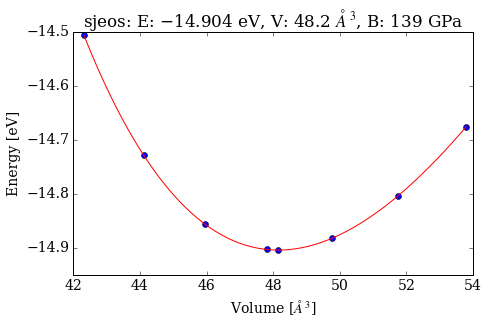

-- fit results are saved in  figs/Cu2.su.ion.100.png 

-- Attention!, cluster None is not found, using default cee 

--        inherit_icalc(): starting supercell mode ... 

-- Calculating mul_matrix for ortho: [7, 7, 7] 

mul_matrix_float:
 [[ 1.92415477  0.          0.        ]
 [ 0.          1.92415477  0.        ]
 [ 0.          0.          1.92415477]] 
mul_matrix:
 [[2 0 0]
 [0 2 0]
 [0 0 2]] 
Old vectors (rprimd):
 [[ 3.6  0.   0. ]
 [ 0.   3.6  0. ]
 [ 0.   0.   3.6]] 
New vectors (rprimd) of supercell:
 [[ 7.3  0.   0. ]
 [ 0.   7.3  0. ]
 [ 0.   0.   7.3]] 
The supercell should contain 32.0 atoms ... 
  -- OK 

-- Warning! File ./Cu/scaled//super//Cu2.su.s7/Cu2.su.s7.inherit.supercell.100.geo was replaced 

-- File xyz/Cu2.su.ion.100.end_supercell.xyz was written 

-- check_kpoints(): Kpoint   mesh is:  [4, 4, 4] 

-- check_kpoints(): The actual k-spacings are  [ 0.22  0.22  0.22] 

-- POSCAR was written to /home/aksenov/Simulation_wrapper/siman/tutorials/Cu/scaled//super///C

[{'vol': 48.15,
  'id': ('Cu2.su', 'ion', 100),
  'proto': 'XNone',
  'B': 139.01017725881573,
  'DS': 'None',
  'ion': 'Cu2',
  'name': 'Cu2',
  'x': '100%'}]

In [8]:
calc_barriers('normal', 'Li', 'Li', show_fit = 1, up = 0, upA = 0, upC = 0, param_dic = pd, add_loop_dic = {'run':1})

###3. Read supercell and start NEB calculation using the same calculation
This step uses *add_neb* subroutine from neb.py
To choose different paths change  
pd['start_pos'] and 
pd['end_pos'] values

The command suggest you possible values of initial and final positions, see below.   
If you want to study migration of substitution atom, then
use additional arguments:

In [4]:
pd['el']              = 'Cu' # Cu atom is chosen for moving
pd['i_atom_to_move']  = 1    # number of atom to move
pd['rep_moving_atom'] = 'Li' # replace moving atom with Li


###3.1 Migration of substitution atom

In [5]:
calc_barriers('normal', 'Cu', 'Cu', show_fit = 0, up = 0, upA = 0, upC = 0, param_dic = pd, add_loop_dic = {'run':0})
# after running this command, go to ./xyz/Cu2.su.s7v100.n5Cu2Cu2v1rLi_all and check the created path


-- optimize_cell(): scale_region changed from (-4, 4) to (-4, 4) 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Cu2.su.ion.100']          |  -14.9034  |3.64;3.64;3.64|  -608,-608,-608    |   1,11, 11    
-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Cu2.su.s7.ion.100']       | -119.2308  |7.28;7.28;7.28|  -755,-755,-755    |   1,13, 13    
-- add_neb(): atom Cu will be moved 

-- add_neb(): *i_atom_to_move* =  1 is used 

-- Please choose position using *i_void_start* : [1] 

-- Position 1 chosen, atom: 2 Cu 

-- You have chosen vacancy_creation mode of add_neb tool 

-- Type of atom to move =  Cu 

I can suggest you 12 end positions. The distances to them are :  [ 2.57  2.57  2.57  2.57  2.57  2.57  2.57  2.57  2.57  2.57  2.57  2.57]  A
  They are  Cu [] atoms, use *i_void_final* to choose required: 1, 2, 3 .. 

-- Choosing position  1 with 

[{'B': 139.01017725881573,
  'DS': 'None',
  'x': '100%',
  'id_sc': ('Cu2.su.s7', 'ion', 100),
  'ion': 'Cu2',
  'id': ('Cu2.su', 'ion', 100),
  'proto': 'XNone',
  'vol': 48.15,
  'name': 'Cu2'}]

###3.2 Migration of interstitial atom
Attention! This mode relies on C++ routine siman/findpores.cpp; It should be compiled with siman/make_findpores first

In [8]:
pd['i_atom_to_move'] = None
pd['rep_moving_atom'] = None
pd['el']              = 'Li'
calc_barriers('normal', 'Li', 'Li', show_fit = 0, up = 0, upA = 0, upC = 1, param_dic = pd, add_loop_dic = {'run':0})
#after the command is finished please check Cu2.su.s7v100.n5i0e1Li_all folder with POSCARs


-- optimize_cell(): scale_region changed from (-4, 4) to (-4, 4) 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Cu2.su.ion.100']          |  -14.9034  |3.64;3.64;3.64|  -608,-608,-608    |   1,11, 11    
-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Cu2.su.s7.ion.100']       | -119.2308  |7.28;7.28;7.28|  -755,-755,-755    |   1,13, 13    
-- No atoms to move found, you probably gave me deintercalated structure 

-- Searching for voids 

-- File xyz/Cu2.su.s7.ion.100.end_possible_positions.xyz was written 

-- File xyz/Cu2.su.s7.ion.100.end_possible_positions_replicated.xyz was written 

Sum of distances to 6 neighboring atoms for each void (A):
 [ 10.91  10.91  10.91  10.91  10.91  10.91  10.91  10.91  10.91  10.91
  10.91  10.91  10.91  10.91  10.91  10.91  10.91  10.91  10.91  10.91
  10.91  10.91  10.91  10.91  10.91  10.91  10.91  10.91  

[{'B': 139.01017725881573,
  'DS': 'None',
  'x': '100%',
  'id_sc': ('Cu2.su.s7', 'ion', 100),
  'ion': 'Cu2',
  'id': ('Cu2.su', 'ion', 100),
  'proto': 'XNone',
  'vol': 48.15,
  'name': 'Cu2'}]

###3.3 Using starting cell with Li
Assuming you already have supercell with Li, the migration barrier for its migration can be calculated as follows
using add_neb:



In [10]:
#Here we use additional parameter *end_pos_types_z*; it allow to use Cu as final positions for Li migration

from neb import add_neb
st = smart_structure_read('Cu/POSCAR_Cu310A2Liis2_1lo_2_end')
add_neb(st = st, it_new = 'Cu310A2_212Li', ise_new = 'ion', it_folder = 'Cu/neb',
        images = 5,  i_atom_to_move = 215,  i_void_final = 6, end_pos_types_z = [29])

#Check created path in xyz/Cu310A2_212Li.n5Li216Li216v6_all

-- add_neb(): atom Li will be moved 

-- add_neb(): *i_atom_to_move* =  215 is used 

-- Please choose position using *i_void_start* : [1] 

-- Position 1 chosen, atom: 216 Li 

-- You have chosen vacancy_creation mode of add_neb tool 

-- Type of atom to move =  Li 

I can suggest you 12 end positions. The distances to them are :  [ 2.24  2.44  2.45  2.45  2.45  2.55  2.58  2.58  2.72  2.72  3.39  3.61]  A
  They are  Li ['Cu'] atoms, use *i_void_final* to choose required: 1, 2, 3 .. 

-- Choosing position  6 with distance 2.55 A 

-- number of atom to delete =  11 

-- Making vacancy at end position for starting configuration 

-- Creating geo files for starting and final configurations (versions 1 and 2)  

replace_atoms(): atom 214 Li replaced with Li
replace_atoms(): atom 214 Li replaced with Li
replace_atoms(): atom 214 Li replaced with Pu
replace_atoms(): atom 214 Li replaced with Pu
-- File xyz/Cu310A2_212Li.n5Li216Li216v6_start.xyz was written 

-- File xyz/Cu310A2_212Li.n5Li2

'Cu310A2_212Li.n5Li216Li216v6'

In [14]:
write_database()


Database has been successfully updated

